Perform K-means Clustering to an Image to cluster similar colors, and reduce the number of colors to a reduced k value.

In [1]:
from __future__ import print_function
%matplotlib inline
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as image
plt.style.use('ggplot')

from skimage import io
from sklearn.cluster import KMeans

from ipywidgets import interact, interactive, fixed, interact_manual, IntSlider
import ipywidgets as widgets


Bad key "text.kerning_factor" on line 4 in
C:\Users\DELL\Anaconda3\lib\site-packages\matplotlib\mpl-data\stylelib\_classic_test_patch.mplstyle.
You probably need to get an updated matplotlibrc file from
https://github.com/matplotlib/matplotlib/blob/v3.1.3/matplotlibrc.template
or from the matplotlib source distribution


In [2]:
plt.rcParams['figure.figsize'] = (20, 12)

# 1. Data Preprocessing

Importing images from a local directory and store them as numpy arrays. Exploring the image attributes. Normalizing the pixel values and unroll the arrays into vectors.


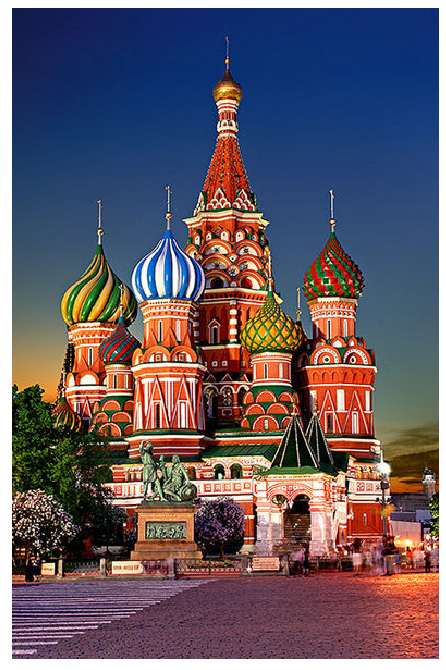

In [5]:
img = io.imread('images/1-Saint-Basils-Cathedral.jpg')
ax = plt.axes(xticks=[], yticks=[])
ax.imshow(img);    #if u put semicolon then matplotlib detail line won't show 

In [7]:
img.shape

(600, 394, 3)

In [9]:
data = (img/255.0).reshape(-1, 3)   #we put -1 so that numpy does the broadcasting itself
data.shape

(236400, 3)

In [11]:
data[0:5][:]

array([[0.05882353, 0.10980392, 0.28627451],
       [0.05882353, 0.10980392, 0.28627451],
       [0.05882353, 0.10980392, 0.28627451],
       [0.05882353, 0.10980392, 0.28627451],
       [0.05882353, 0.10980392, 0.28627451]])

# 2. Visualizing Color Space Using Point Clouds

Visualizing the set of pixels from the original image as a two 2-D point clouds in color space.

In [50]:
class plot_colors:
    def __init__(self, img_data, title, num_pixels = 10000, colors = None):
        self.img_data = img_data
        self.title = title
        self.num_pixels = num_pixels
        self.colors = colors
        
    def colorspace(self):
        if self.colors is None:
            self.colors = self.img_data
            
        rand = np.random.RandomState(30)
        index = rand.permutation(self.img_data.shape[0])[:self.num_pixels]   #index num_pixels number of values from the random list created which has shape[0] number of elements  
        colors = self.colors[index]             #use these indexes to index the color values ie, centroid centers of each point on that index
        R, G, B = self.img_data[index].T        #take the 3 color values of all points
        fig, ax = plt.subplots(1, 2, figsize = (12, 8))
        ax[0].scatter(R, G, color = colors, marker = '.')       #for each point print it's color
        ax[0].set(xlabel = 'Red', ylabel = 'Green', xlim = (0,1), ylim = (0,1))
        ax[1].scatter(R, B, color = colors, marker = '.')
        ax[1].set(xlabel = 'Red', ylabel = 'Blue', xlim = (0,1), ylim = (0,1))
        fig.suptitle(self.title, size = 20)

In [39]:
rand = np.random.RandomState()
x = rand.permutation(10)
print(x[:5])

[3 8 4 9 6]


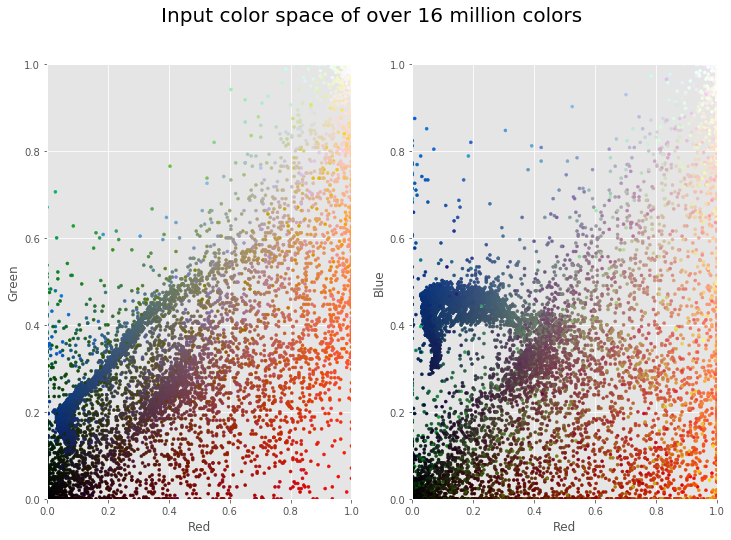

In [51]:
x = plot_colors(data, title = "Input color space of over 16 million colors")
x.colorspace()

# 3. Visualizing K-means reduced color space

Performing k-means clustering with scikit-learn's MiniBatchKMeans to reduce the number of possible colors in the image from over 16 million to 16. We also compare and contrast the color space of the original image with that of the k-means compressed image.


In [42]:
from sklearn.cluster import MiniBatchKMeans

In [48]:
kmeans = MiniBatchKMeans(16).fit(data)
k_colors = kmeans.cluster_centers_[kmeans.predict(data)]

In [43]:
s = kmeans.predict(data)
print(s)

[ 3  3  3 ...  8  1 15]


In [44]:
kmeans.cluster_centers_[[3, 3, 15, 4, 4]]

array([[0.06045331, 0.18379104, 0.42315076],
       [0.06045331, 0.18379104, 0.42315076],
       [0.31711554, 0.21782888, 0.21673242],
       [0.67119026, 0.13940601, 0.05629278],
       [0.67119026, 0.13940601, 0.05629278]])

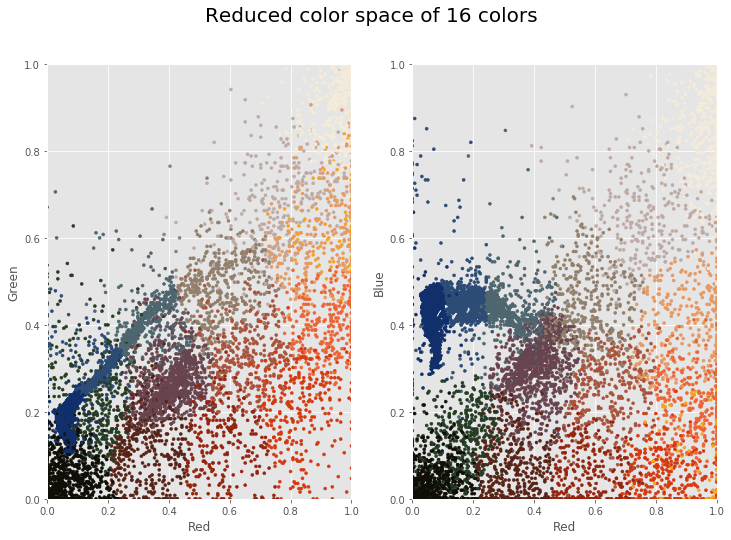

In [52]:
y = plot_colors(data, colors = k_colors, title = "Reduced color space of 16 colors")
y.colorspace()

# 4. K-means Image Compression with Interactive Control

Interacting control is useful as we needn't re-run the same code just by changing input parameters and compare for EDA. Use the interact function to automatically create UI controls for function arguments. Define an argument to control the value of k using a slider. Define an argument to pick any image from a specified directory. Ensuring that k-means image compression is performed only on the slider widget's mouse release events. Repurposing the data pre-processing and k-means clustering logic from previous tasks to operate on images of your choice. Visualizing how the image changes as the number of clusters fed to the k-means algorithm is varied.



In [53]:
img_dir = 'images/'

In [60]:
@interact
def color_compression(image = os.listdir(img_dir), k= IntSlider(min = 1, max = 256,
                                                                 step = 1, value = 16,
                                                                 continuous_update = False,
                                                                 layout = dict(width='100%'))):
    
    input_img = io.imread(img_dir+image)
    data = (input_img/255.0).reshape(-1, 3)
    kmeans = MiniBatchKMeans(k).fit(data)
    k_colors = kmeans.cluster_centers_[kmeans.predict(data)]
    k_img = np.reshape(k_colors, (input_img.shape))
    
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle('K-Means Image Compression', fontsize=20)
    ax1.set_title('Compressed Image')
    ax1.set_xticks([])
    ax1.set_yticks([])
    ax1.imshow(k_img)
    ax2.set_title('Original Image')
    ax2.set_xticks([])
    ax2.set_yticks([])
    ax2.imshow(input_img)
    
    plt.subplots_adjust(top = 0.85)
    plt.show()

interactive(children=(Dropdown(description='image', options=('1-Saint-Basils-Cathedral.jpg', '2-new-york-skyli…